In [3]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cardekho_dataset.csv to cardekho_dataset.csv


In [5]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['cardekho_dataset.csv']), usecols=['car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'])
dataset.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
### dropping brand and model as these details are present in car_name feature
dataset.drop(['brand', 'model'], axis=1, inplace=True)
dataset.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [10]:
### getting list of continuous features
continuous_features=[feature for feature in [feature for feature in dataset.columns if dataset[feature].dtypes!='O'] if len(dataset[feature].unique())>25]
continuous_features

['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']

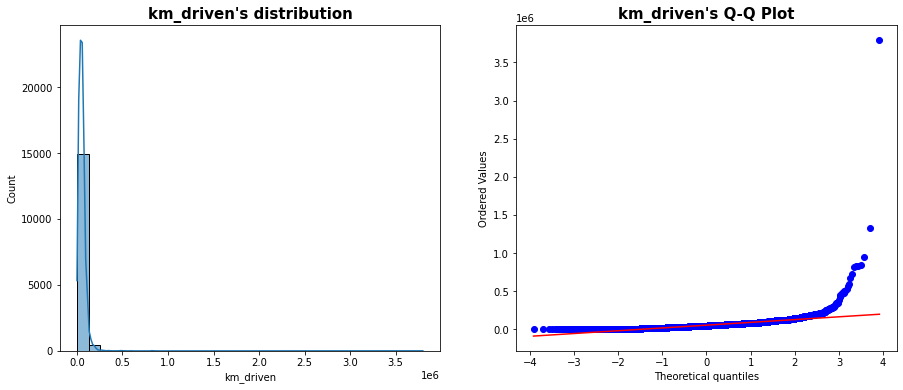

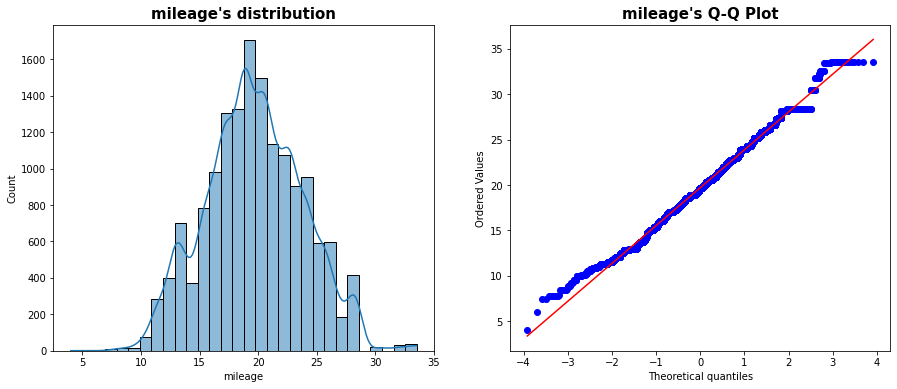

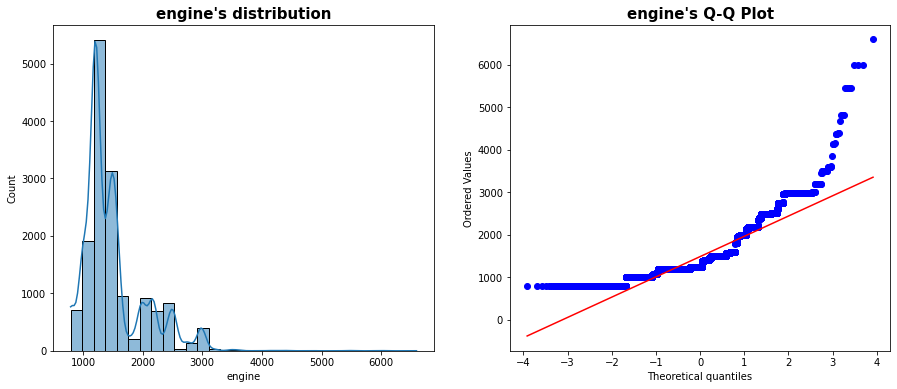

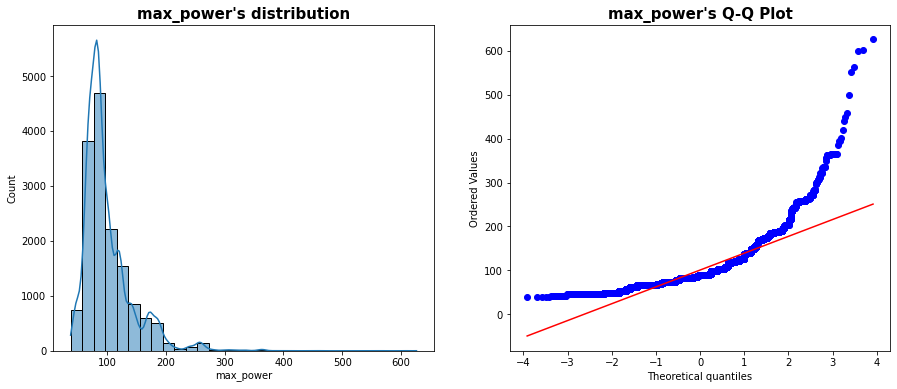

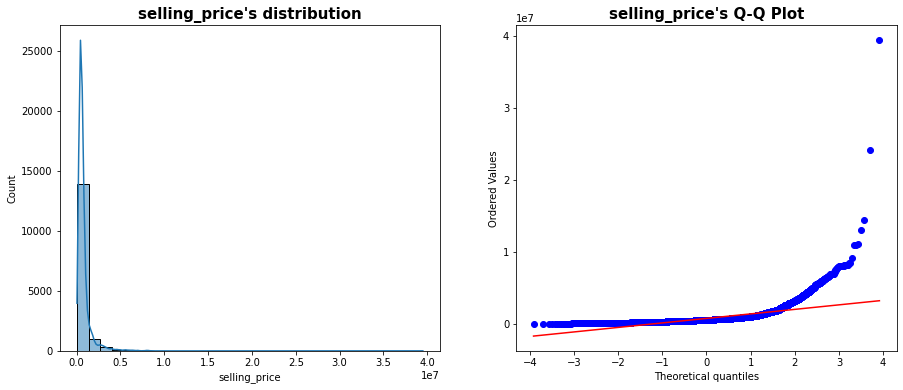

In [11]:
### Checking distribution of continuous features before outlier capping

for feature in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=feature, kde=True, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold", fontsize=15)
    
    plt.subplot(122)
    stats.probplot(dataset[feature], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

In [12]:
### Capping outliers from continuous features
for feature in continuous_features:
    dataset=remove_outliers(dataset, feature)

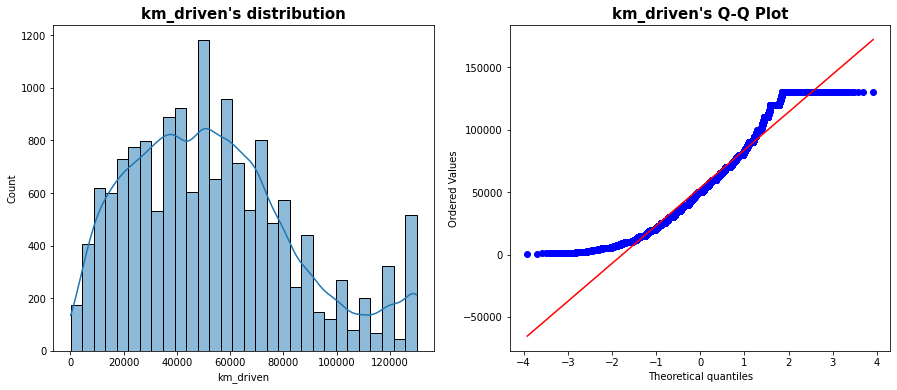

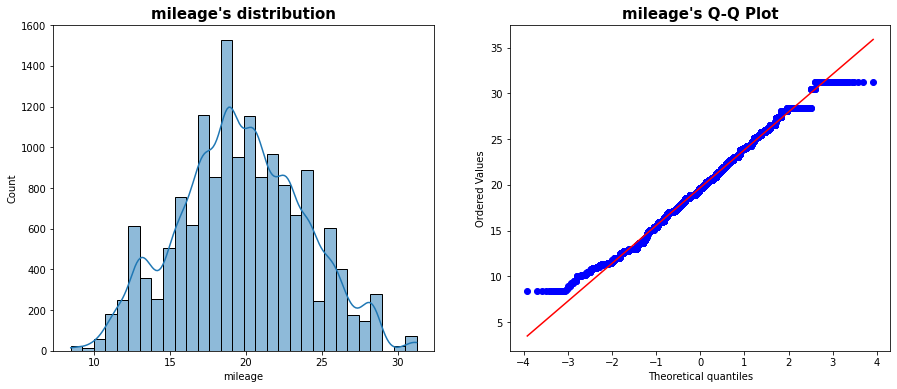

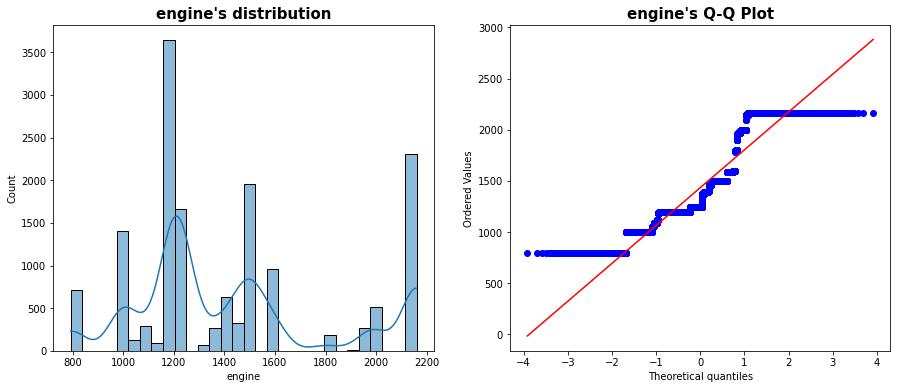

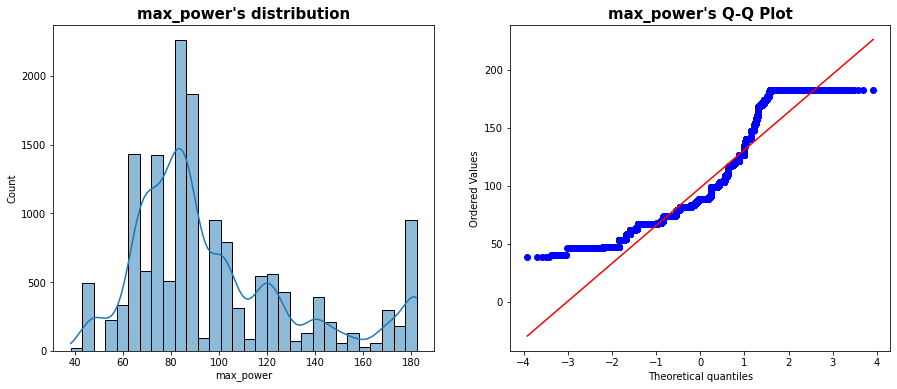

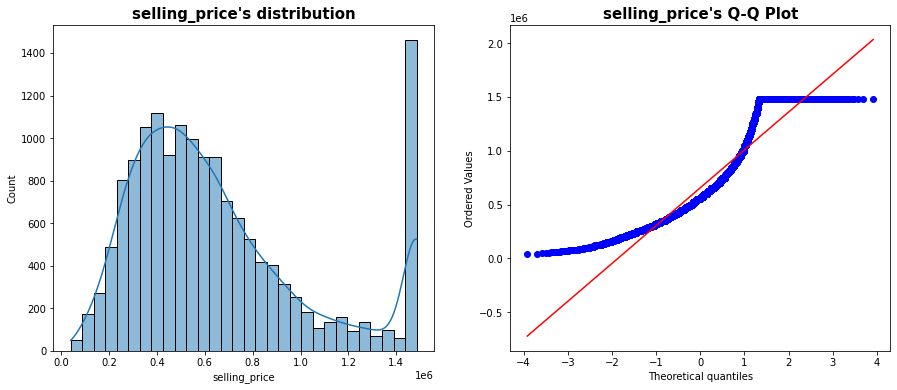

In [13]:
### Checking distribution of continuous features after outlier capping

for feature in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=feature, kde=True, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold", fontsize=15)
    
    plt.subplot(122)
    stats.probplot(dataset[feature], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

In [14]:
### creating list of features for scaling and encoding
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O' and feature not in ['selling_price']]
onehot_enc_col= ['seller_type','fuel_type','transmission_type']
binary_enc_col= ['car_name']

In [15]:
### Standard scalar Object for feature scaling
scalar = StandardScaler()

### one hot encoder object for 2 or 3 categories at max
onehot_enc = OneHotEncoder()

### using binary encoder for car_name feature as this has many categories
binary_enc = BinaryEncoder()

### Creating column transformer to implement above objects
column_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", onehot_enc, onehot_enc_col),
         ("StandardScaler", scalar, numerical_features),
        ("BinaryEncoder", binary_enc, binary_enc_col)
        
    ]
)

In [16]:
### Splitting independent and dependent features
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5


In [17]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [19]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.head(3)

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
11210,Volvo XC60,7,70252,Dealer,Diesel,Automatic,11.20,2159.5,182.25,5
1347,Tata Tiago,2,10000,Individual,Petrol,Manual,23.84,1199.0,84.00,5
10363,Mercedes-Benz CLS,2,6000,Dealer,Diesel,Automatic,19.00,1950.0,182.25,5


In [20]:
y_train.head(3)

11210    1485000
1347      515000
10363    1485000
Name: selling_price, dtype: int64

In [21]:
X_test.head(3)

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
3334,Hyundai i10,12,73000,Dealer,Petrol,Manual,20.36,1197.0,78.90,5
10928,Maruti Baleno,4,58000,Individual,Diesel,Manual,27.39,1248.0,74.00,5
2518,Maruti Ertiga,7,96000,Dealer,Diesel,Manual,20.77,1248.0,88.76,7


In [22]:
y_test.head(3)

3334     190000
10928    600000
2518     665000
Name: selling_price, dtype: int64

In [23]:
X_train.shape, y_train.shape

((12328, 10), (12328,))

In [24]:
X_test.shape, y_test.shape

((3083, 10), (3083,))

In [25]:
X_train=column_transformer.fit_transform(X_train)
X_train

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [26]:
X_test=column_transformer.transform(X_test)
X_test

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [27]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val, X_test_val):
    """
    The function takes actual value, predicted value and X test value as 
    argument and returns Mean square error, Mean absolute error, Root 
    mean square error, r2 score and adjusted r2 score rounded to 3 decimal 
    places.
    """
    mse=round(mean_squared_error(actual_val, pred_val),3)
    mae=round(mean_absolute_error(actual_val, pred_val),3)
    rmse=round(np.sqrt(mean_squared_error(actual_val, pred_val)),3)
    r2_sco=round(r2_score(actual_val, pred_val),3)
    adj_r2_sco=round(1-(1-r2_sco)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3)
    return mse, mae, rmse, r2_sco, adj_r2_sco

In [28]:
### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

### Performing hyper parameter tuning for Random Forest Regressor, Decision Tree Regressor and Support Vector Classifier

In [29]:
rfr_params={'n_estimators':[100,200, 500],
           'max_depth': [None, 5,10,15],
           'min_samples_leaf': [5,10,15,20]}

dtr_params={'max_depth': [None, 5,10,15],
           'min_samples_leaf': [5,10,15,20],
            'max_features': ['sqrt', 'log2']}

svr_params={'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
            'degree': [1,2,3,5,10],
            'gamma': ['scale', 'auto']}

In [32]:
model_list_grid=[('RF', RandomForestRegressor(), rfr_params),
                 ('DTR', DecisionTreeRegressor(), dtr_params),
                 ('SVR', SVR(), svr_params)]

In [33]:
model_param={}
for name, model, params in model_list_grid:
  grid=GridSearchCV(estimator=model,
                    param_grid=params,
                    cv=2, 
                    verbose=2)
  grid.fit(X_train, y_train)
  model_param[name]=grid.best_params_

for model_name in model_param:
    print("Best param for {} is {}".format(model_name, model_param[model_name]))
    print(model_param[model_name])


Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=200; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=500; total time=  10.3s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=500; total time=  12.5s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=500; total time=   9.2s
[CV] END max_depth=None, min_sam

In [34]:
models={
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF']),
    "Decision Tree Regressor": RandomForestRegressor(**model_param['DTR']),
    "Support Vector Regressor": SVR(**model_param['SVR'])
}
### Creating empty list to store model names
model_list=[]
### creating empty list to store r2 score for each model
r2_score_list=[]
### creating empty list for storing adjusted r2 score
adj_r2_score=[]
### creating list to store mse
mse_list=[]
### creating list to store mae
mae_list=[]
### creating list to store rmse
rmse_list=[]

In [35]:
### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
    print("Model Performance for Test dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
    ### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    r2_score_list.append(r2_sco)
    adj_r2_score.append(adj_r2_sco)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    print("*"*50)
    print("\n")

Random Forest Regressor Model

Model Performance for training dataset
Mean Square Error: 5396927395.188
Mean Absolute Error: 49972.499
Root Mean Square Error: 73463.783
R2 Score: 0.96
Adjusted R2 Score: 0.96
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 9816852383.632
Mean Absolute Error: 65757.972
Root Mean Square Error: 99080.03
R2 Score: 0.933
Adjusted R2 Score: 0.932
**************************************************


Decision Tree Regressor Model

Model Performance for training dataset
Mean Square Error: 7778744328.704
Mean Absolute Error: 62642.819
Root Mean Square Error: 88197.19
R2 Score: 0.943
Adjusted R2 Score: 0.943
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 10538950996.38
Mean Absolute Error: 72211.505
Root Mean Square Error: 102659.393
R2 Score: 0.928
Adjusted R2 Score: 0.927
**************************************************


Support Vector Regressor 

In [36]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, r2_score_list, adj_r2_score, mse_list, mae_list, rmse_list)), columns=['Model', 'R2_score', 'Adjusted R2_score', 'MSE', 'MAE', 'RMSE']).sort_values(by=['R2_score'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,R2_score,Adjusted R2_score,MSE,MAE,RMSE
0,Random Forest Regressor,0.933,0.932,9.816852e+09,65757.972,99080.030
1,Decision Tree Regressor,0.928,0.927,1.053895e+10,72211.505,102659.393
2,Support Vector Regressor,0.093,0.086,1.324136e+11,269408.173,363886.772
